# DATA PREDIKSI CUACA DI JAKARTA 9-13 APRIL 2023

Melakukan proses request data pada Visual Studio Code dengan library requests

In [ ]:
import requests

url_pred = "http://api.worldweatheronline.com/premium/v1/weather.ashx?key=7fa2c1a51f8d490d89b84438230904&q=Jakarta&format=json&num_of_days=5&includelocation=yes&showlocaltime=yes&aqi=yes"

payload_pred ={}
headers_pred = {}

response_pred = requests.request("GET", url_pred, headers=headers_pred, data=payload_pred)

print(response_pred.text)


{"data":{"request":[{"type":"City","query":"Jakarta, Indonesia"}],"nearest_area":[{"areaName":[{"value":"Jakarta"}],"country":[{"value":"Indonesia"}],"region":[{"value":"Jakarta Raya"}],"latitude":"-6.215","longitude":"106.845"}],"time_zone":[{"localtime":"2023-04-09 17:22","utcOffset":"7.0","zone":"Asia/Jakarta"}],"current_condition":[{"observation_time":"10:22 AM","temp_C":"30","temp_F":"86","weatherCode":"116","weatherIconUrl":[{"value":"https://cdn.worldweatheronline.com/images/wsymbols01_png_64/wsymbol_0002_sunny_intervals.png"}],"weatherDesc":[{"value":"Partly cloudy"}],"windspeedMiles":"9","windspeedKmph":"15","winddirDegree":"340","winddir16Point":"NNW","precipMM":"0.0","precipInches":"0.0","humidity":"75","visibility":"10","visibilityMiles":"6","pressure":"1008","pressureInches":"30","cloudcover":"25","FeelsLikeC":"32","FeelsLikeF":"90","uvIndex":"8","air_quality":{"co":"2563.5","no2":"71.30000305175781","o3":"29.299999237060547","so2":"30.5","pm2_5":"58.5","pm10":"74.59999847

Dilakukan perubahan tipe data menjadi dalam bentuk json dengan bantuan 'json_loads()'

In [ ]:
# Ganti tipe ke JSON
import json

json_data_pred = json.loads(response_pred.text)
json_data_pred['data']

{'request': [{'type': 'City', 'query': 'Jakarta, Indonesia'}],
 'nearest_area': [{'areaName': [{'value': 'Jakarta'}],
   'country': [{'value': 'Indonesia'}],
   'region': [{'value': 'Jakarta Raya'}],
   'latitude': '-6.215',
   'longitude': '106.845'}],
 'time_zone': [{'localtime': '2023-04-09 17:22',
   'utcOffset': '7.0',
   'zone': 'Asia/Jakarta'}],
 'current_condition': [{'observation_time': '10:22 AM',
   'temp_C': '30',
   'temp_F': '86',
   'weatherCode': '116',
   'weatherIconUrl': [{'value': 'https://cdn.worldweatheronline.com/images/wsymbols01_png_64/wsymbol_0002_sunny_intervals.png'}],
   'weatherDesc': [{'value': 'Partly cloudy'}],
   'windspeedMiles': '9',
   'windspeedKmph': '15',
   'winddirDegree': '340',
   'winddir16Point': 'NNW',
   'precipMM': '0.0',
   'precipInches': '0.0',
   'humidity': '75',
   'visibility': '10',
   'visibilityMiles': '6',
   'pressure': '1008',
   'pressureInches': '30',
   'cloudcover': '25',
   'FeelsLikeC': '32',
   'FeelsLikeF': '90',
   

In [ ]:
# jika json_data_pred sudah disave dalam file .json terpisah untuk mengatasi error saat run kembali...
# ...gunakan cara berikut untuk load kembali

# Ganti tipe ke JSON
import json

# Open the JSON file
with open('pred.json') as f_pred:
    # Load the JSON data into Python object
    json_data_pred = json.load(f_pred)

# Print the data
print(json_data_pred)

{'data': {'request': [{'type': 'City', 'query': 'Jakarta, Indonesia'}], 'nearest_area': [{'areaName': [{'value': 'Jakarta'}], 'country': [{'value': 'Indonesia'}], 'region': [{'value': 'Jakarta Raya'}], 'latitude': '-6.215', 'longitude': '106.845'}], 'time_zone': [{'localtime': '2023-04-09 16:54', 'utcOffset': '7.0', 'zone': 'Asia/Jakarta'}], 'current_condition': [{'observation_time': '09:54 AM', 'temp_C': '30', 'temp_F': '86', 'weatherCode': '116', 'weatherIconUrl': [{'value': 'https://cdn.worldweatheronline.com/images/wsymbols01_png_64/wsymbol_0002_sunny_intervals.png'}], 'weatherDesc': [{'value': 'Partly cloudy'}], 'windspeedMiles': '11', 'windspeedKmph': '17', 'winddirDegree': '340', 'winddir16Point': 'NNW', 'precipMM': '0.0', 'precipInches': '0.0', 'humidity': '75', 'visibility': '10', 'visibilityMiles': '6', 'pressure': '1008', 'pressureInches': '30', 'cloudcover': '25', 'FeelsLikeC': '32', 'FeelsLikeF': '90', 'uvIndex': '8', 'air_quality': {'co': '1415.300048828125', 'no2': '40.4

Data prediksi yang sudah diperoleh dalam bentuk json, selanjutnya dibentuk ke dalam bentuk dataframe. Data-data yang dimasukan pada dataframe kali ini hanya beberapa sehingga digunakan iterasi untuk mengambil data yang akan dipilih. Pengambilan data untuk membuat dataframe yang dilakukan dengan for looping disesuaikan dengan struktur JSON

In [ ]:
#proses dataframe untuk data prediksi cuaca 5 hari kedepan sejak tanggal 9 April 2023 - 13 April 2023
import pandas as pd

data_pred=[]
rows = json_data_pred['data']['weather']
for i in range(0, len(rows)):
    date = json_data_pred['data']['weather'][i]['date']
    sunrise = json_data_pred['data']['weather'][i]['astronomy'][0]['sunrise']
    sunset = json_data_pred['data']['weather'][i]['astronomy'][0]['sunset']
    moonrise = json_data_pred['data']['weather'][i]['astronomy'][0]['moonrise']
    moonset = json_data_pred['data']['weather'][i]['astronomy'][0]['moonset']
    moon_phase = json_data_pred['data']['weather'][i]['astronomy'][0]['moon_phase']
    maxtempC = json_data_pred['data']['weather'][i]['maxtempC']
    maxtempF = json_data_pred['data']['weather'][i]['maxtempF']
    mintempC = json_data_pred['data']['weather'][i]['mintempC']
    mintempF = json_data_pred['data']['weather'][i]['maxtempF']
    avgtempC = json_data_pred['data']['weather'][i]['avgtempC']
    avgtempF = json_data_pred['data']['weather'][i]['avgtempF']
    uv_index = json_data_pred['data']['weather'][i]['uvIndex']

    data_pred.append(
        (date, sunrise, sunset, moonrise, moonset, moon_phase, maxtempC, maxtempF, mintempC, mintempF, avgtempC, avgtempF, uv_index)
    )

df_pred = pd.DataFrame(data_pred, columns=['Date', 'Prediksi Sunrise', 'Prediksi Sunset', 'Prediksi Moonrise', 'Prediksi Moonset', 'Prediksi Fase Bulan', 'Prediksi Max Temp (C)','Prediksi Max Temp (F)','Prediksi Min Temp (C)','Prediksi Min Temp (F)', 'Prediksi Avg Temp (C)', 'Prediksi Avg Temp (F)', 'Prediksi UV Index'])
df_pred

,Date,Prediksi Sunrise,Prediksi Sunset,Prediksi Moonrise,Prediksi Moonset,Prediksi Fase Bulan,Prediksi Max Temp (C),Prediksi Max Temp (F),Prediksi Min Temp (C),Prediksi Min Temp (F),Prediksi Avg Temp (C),Prediksi Avg Temp (F),Prediksi UV Index
0,2023-04-09,05:54 AM,05:54 PM,08:22 PM,08:15 AM,Waning Gibbous,35,96,26,96,30,85,6
1,2023-04-10,05:54 AM,05:54 PM,09:17 PM,09:12 AM,Waning Gibbous,36,96,26,96,30,86,8
2,2023-04-11,05:54 AM,05:53 PM,10:15 PM,10:11 AM,Waning Gibbous,35,94,26,94,30,86,7
3,2023-04-12,05:54 AM,05:53 PM,11:17 PM,11:13 AM,Waning Gibbous,36,97,26,97,30,87,8
4,2023-04-13,05:54 AM,05:53 PM,No moonrise,12:13 PM,Last Quarter,36,96,27,96,30,87,7


# DATA AKTUAL CUACA DI JAKARTA 9-13 APRIL 2023

Melakukan proses request data pada Visual Studio Code dengan library requests

In [ ]:
import requests

url_hist = "http://api.worldweatheronline.com/premium/v1/past-weather.ashx?key=e5c73e6801fb445293003332230904 &q=Jakarta&format=json&date=2023-04-09&enddate=2023-04-13&includelocation=yes"

payload_hist = {}
headers_hist = {}

response_hist = requests.request("GET", url_hist, headers=headers_hist, data=payload_hist)

print(response_hist.text)


{"data":{"request":[{"type":"City","query":"Jakarta, Indonesia"}],"nearest_area":[{"areaName":[{"value":"Jakarta"}],"country":[{"value":"Indonesia"}],"region":[{"value":"Jakarta Raya"}],"latitude":"-6.215","longitude":"106.845"}],"weather":[{"date":"2023-04-09","astronomy":[{"sunrise":"05:54 AM","sunset":"05:54 PM","moonrise":"08:23 PM","moonset":"08:15 AM","moon_phase":"Waning Gibbous","moon_illumination":"65"}],"maxtempC":"34","maxtempF":"93","mintempC":"26","mintempF":"79","avgtempC":"29","avgtempF":"85","totalSnow_cm":"0.0","sunHour":"11.6","uvIndex":"6","hourly":[{"time":"0","tempC":"27","tempF":"80","windspeedMiles":"4","windspeedKmph":"6","winddirDegree":"196","winddir16Point":"SSW","weatherCode":"176","weatherIconUrl":[{"value":"https://cdn.worldweatheronline.com/images/wsymbols01_png_64/wsymbol_0025_light_rain_showers_night.png"}],"weatherDesc":[{"value":"Patchy rain possible"}],"precipMM":"0.1","precipInches":"0.0","humidity":"75","visibility":"10","visibilityMiles":"6","pres

Dilakukan perubahan tipe data menjadi dalam bentuk json dengan bantuan 'json_loads()'

In [ ]:
# Ganti tipe ke JSON
import json

json_data_hist = json.loads(response_hist.text)
json_data_hist['data']

{'request': [{'type': 'City', 'query': 'Jakarta, Indonesia'}],
 'nearest_area': [{'areaName': [{'value': 'Jakarta'}],
   'country': [{'value': 'Indonesia'}],
   'region': [{'value': 'Jakarta Raya'}],
   'latitude': '-6.215',
   'longitude': '106.845'}],
 'weather': [{'date': '2023-04-09',
   'astronomy': [{'sunrise': '05:54 AM',
     'sunset': '05:54 PM',
     'moonrise': '08:23 PM',
     'moonset': '08:15 AM',
     'moon_phase': 'Waning Gibbous',
     'moon_illumination': '65'}],
   'maxtempC': '34',
   'maxtempF': '93',
   'mintempC': '26',
   'mintempF': '79',
   'avgtempC': '29',
   'avgtempF': '85',
   'totalSnow_cm': '0.0',
   'sunHour': '11.6',
   'uvIndex': '6',
   'hourly': [{'time': '0',
     'tempC': '27',
     'tempF': '80',
     'windspeedMiles': '4',
     'windspeedKmph': '6',
     'winddirDegree': '196',
     'winddir16Point': 'SSW',
     'weatherCode': '176',
     'weatherIconUrl': [{'value': 'https://cdn.worldweatheronline.com/images/wsymbols01_png_64/wsymbol_0025_ligh

In [ ]:
# jika json_data_hist sudah disave dalam file .json terpisah untuk mengatasi error saat run kembali...
# ...gunakan cara berikut untuk load kembali

# Ganti tipe ke JSON
import json

# Open the JSON file
with open('history.json') as f_hist:
    # Load the JSON data into Python object
    json_data_hist = json.load(f_hist)

# Print the data
print(json_data_hist)

{'data': {'request': [{'type': 'City', 'query': 'Jakarta, Indonesia'}], 'nearest_area': [{'areaName': [{'value': 'Jakarta'}], 'country': [{'value': 'Indonesia'}], 'region': [{'value': 'Jakarta Raya'}], 'latitude': '-6.215', 'longitude': '106.845'}], 'weather': [{'date': '2023-04-09', 'astronomy': [{'sunrise': '05:54 AM', 'sunset': '05:54 PM', 'moonrise': '08:23 PM', 'moonset': '08:15 AM', 'moon_phase': 'Waning Gibbous', 'moon_illumination': '65'}], 'maxtempC': '34', 'maxtempF': '93', 'mintempC': '26', 'mintempF': '79', 'avgtempC': '29', 'avgtempF': '85', 'totalSnow_cm': '0.0', 'sunHour': '11.6', 'uvIndex': '6', 'hourly': [{'time': '0', 'tempC': '27', 'tempF': '80', 'windspeedMiles': '4', 'windspeedKmph': '6', 'winddirDegree': '196', 'winddir16Point': 'SSW', 'weatherCode': '176', 'weatherIconUrl': [{'value': 'https://cdn.worldweatheronline.com/images/wsymbols01_png_64/wsymbol_0025_light_rain_showers_night.png'}], 'weatherDesc': [{'value': 'Patchy rain possible'}], 'precipMM': '0.1', 'pr

Data aktual yang sudah diperoleh dalam bentuk json, selanjutnya dibentuk ke dalam bentuk dataframe. Data-data yang dimasukan pada dataframe kali ini hanya beberapa sehingga digunakan iterasi untuk mengambil data yang akan dipilih. Pengambilan data untuk membuat dataframe yang dilakukan dengan for looping disesuaikan dengan struktur JSON

In [ ]:
#proses dataframe untuk history data cuaca dari 9-13 April 2023
import pandas as pd

data_hist=[]
rows = json_data_hist['data']['weather']
for i in range(0, len(rows)):
    date = json_data_hist['data']['weather'][i]['date']
    sunrise = json_data_hist['data']['weather'][i]['astronomy'][0]['sunrise']
    sunset = json_data_hist['data']['weather'][i]['astronomy'][0]['sunset']
    moonrise = json_data_hist['data']['weather'][i]['astronomy'][0]['moonrise']
    moonset = json_data_hist['data']['weather'][i]['astronomy'][0]['moonset']
    moon_phase = json_data_hist['data']['weather'][i]['astronomy'][0]['moon_phase']
    maxtempC = json_data_hist['data']['weather'][i]['maxtempC']
    maxtempF = json_data_hist['data']['weather'][i]['maxtempF']
    mintempC = json_data_hist['data']['weather'][i]['mintempC']
    mintempF = json_data_hist['data']['weather'][i]['maxtempF']
    avgtempC = json_data_hist['data']['weather'][i]['avgtempC']
    avgtempF = json_data_hist['data']['weather'][i]['avgtempF']
    uv_index = json_data_hist['data']['weather'][i]['uvIndex']

    data_hist.append(
        (date, sunrise, sunset, moonrise, moonset, moon_phase, maxtempC, maxtempF, mintempC, mintempF, avgtempC, avgtempF, uv_index)
    )

df_hist = pd.DataFrame(data_hist, columns=['Date', 'Sunrise', 'Sunset', 'Moonrise', 'Moonset', 'Fase Bulan', 'Max Temp (C)','Max Temp (F)','Min Temp (C)','Min Temp (F)', 'Avg Temp (C)', 'Avg Temp (F)', 'UV Index'])
df_hist

,Date,Sunrise,Sunset,Moonrise,Moonset,Fase Bulan,Max Temp (C),Max Temp (F),Min Temp (C),Min Temp (F),Avg Temp (C),Avg Temp (F),UV Index
0,2023-04-09,05:54 AM,05:54 PM,08:23 PM,08:15 AM,Waning Gibbous,34,93,26,93,29,85,6
1,2023-04-10,05:54 AM,05:54 PM,09:17 PM,09:12 AM,Waning Gibbous,35,95,26,95,30,86,8
2,2023-04-11,05:54 AM,05:54 PM,10:16 PM,10:11 AM,Waning Gibbous,35,95,26,95,30,86,8
3,2023-04-12,05:54 AM,05:53 PM,11:18 PM,11:13 AM,Last Quarter,35,96,27,96,30,86,8
4,2023-04-13,05:54 AM,05:53 PM,No moonrise,12:14 PM,Last Quarter,34,94,27,94,29,85,7


# Preprocessing Dataframe 'df_pred' dan 'df_hist'

Dilakukan pengantian tipe data untuk beberapa aspek yang diambil yang sebelumnya berupa object diubah menjadi bentuk integer

In [ ]:
# Mengganti tipe data pada df_hist menjadi integer
df_raw = ['Max Temp (C)','Max Temp (F)','Min Temp (C)','Min Temp (F)', 'Avg Temp (C)', 'Avg Temp (F)', 'UV Index']
for i in range (len(df_raw)):
    df_hist[df_raw[i]] = df_hist[df_raw[i]].astype("int")
    

Dilakukan pengecekan tipe data untuk mengetahui apakah kolom yang diganti sudah berubah menjadi bentuk integer.

In [ ]:
# pengecekan tipe data kolom pada df_hist
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          5 non-null      object
 1   Sunrise       5 non-null      object
 2   Sunset        5 non-null      object
 3   Moonrise      5 non-null      object
 4   Moonset       5 non-null      object
 5   Fase Bulan    5 non-null      object
 6   Max Temp (C)  5 non-null      int32 
 7   Max Temp (F)  5 non-null      int32 
 8   Min Temp (C)  5 non-null      int32 
 9   Min Temp (F)  5 non-null      int32 
 10  Avg Temp (C)  5 non-null      int32 
 11  Avg Temp (F)  5 non-null      int32 
 12  UV Index      5 non-null      int32 
dtypes: int32(7), object(6)
memory usage: 512.0+ bytes


Dilakukan pengantian tipe data untuk beberapa aspek yang diambil yang sebelumnya berupa object diubah menjadi bentuk integer

In [ ]:
# Mengganti tipe data kolom pada 'df_raw' menjadi integer
df_raw1 = ['Prediksi Max Temp (C)','Prediksi Max Temp (F)','Prediksi Min Temp (C)','Prediksi Min Temp (F)', 'Prediksi Avg Temp (C)', 'Prediksi Avg Temp (F)', 'Prediksi UV Index']
for i in range (len(df_raw1)):
    df_pred[df_raw1[i]] = df_pred[df_raw1[i]].astype("int")

Dilakukan pengecekan tipe data untuk mengetahui apakah kolom yang diganti sudah berubah menjadi bentuk integer.

In [ ]:
# pengecekan tipe data kolom pada df_pred
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   5 non-null      object
 1   Prediksi Sunrise       5 non-null      object
 2   Prediksi Sunset        5 non-null      object
 3   Prediksi Moonrise      5 non-null      object
 4   Prediksi Moonset       5 non-null      object
 5   Prediksi Fase Bulan    5 non-null      object
 6   Prediksi Max Temp (C)  5 non-null      int32 
 7   Prediksi Max Temp (F)  5 non-null      int32 
 8   Prediksi Min Temp (C)  5 non-null      int32 
 9   Prediksi Min Temp (F)  5 non-null      int32 
 10  Prediksi Avg Temp (C)  5 non-null      int32 
 11  Prediksi Avg Temp (F)  5 non-null      int32 
 12  Prediksi UV Index      5 non-null      int32 
dtypes: int32(7), object(6)
memory usage: 512.0+ bytes


# Analisa Data

### Analisa 1

Dilakukan visualisasi dengan menggunakan line plot dengan bantuan package matplotlib. Visualisasi dilakukan untuk mengetahui perubahan yang terjadi pada UV Index dalam rentang waktu 5 hari

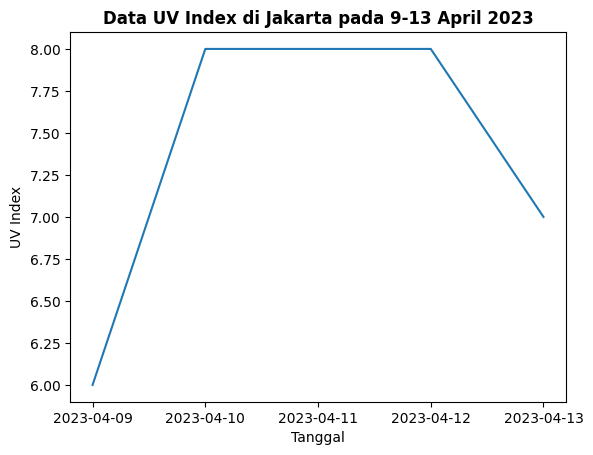

In [ ]:
# visualisasi uv index pada 'df_hist'

import matplotlib.pyplot as plt
plt.plot(df_hist['Date'], df_hist['UV Index'])

# Menambahkan judul dan label sumbu
plt.title('Data UV Index di Jakarta pada 9-13 April 2023', fontweight='bold')
plt.xlabel('Tanggal')
plt.ylabel('UV Index')

# Menampilkan plot
plt.show()

Pada plot diatas, terlihat perubahan UV Index yang terjadi di Jakarta pada tanggal 9-13 April 2023. Dengan angka tertinggi UV Index adalah 8 pada tanggal 10-12 April 2023. Untuk UV Index terendah pada jangka waktu tersebut, berada pada tanggal 9 April 2023 dengan angka 6. Hal tersebut didukung dengan tingginya suhu pada tanggal 10-12 April 2023.

### Analisa 2

Kembali menggunakan line plot, dilakukan visualisasi untuk membandingkan data prediksi dan aktual dari rata-rata temperatur dalam fahrenheit dengan rentang waktu 5 hari. Visualisasi memanfaatkan package matplotlib dimana pada output akan terlihat dua warna berbeda untuk masing-masing data yang digunakan. 

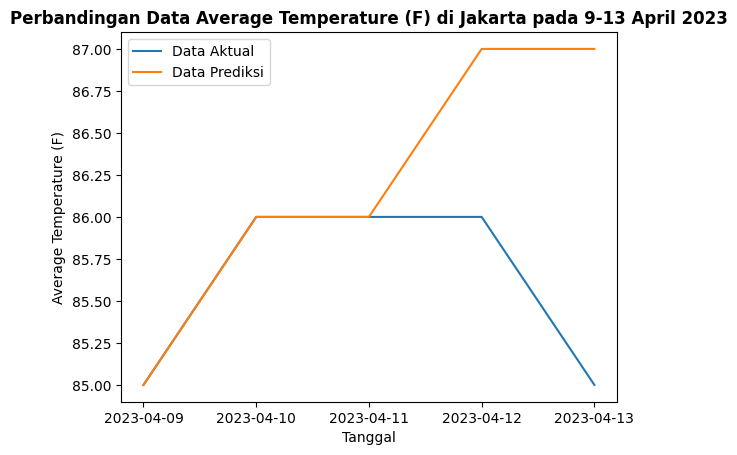

In [ ]:
# visualisasi average temperature (F) pada 'df_hist' 

import matplotlib.pyplot as plt
plt.plot(df_hist['Date'], df_hist['Avg Temp (F)'], label = 'Data Aktual')
plt.plot(df_pred['Date'], df_pred['Prediksi Avg Temp (F)'], label = 'Data Prediksi')

# Menambahkan judul dan label sumbu
plt.title('Perbandingan Data Average Temperature (F) di Jakarta pada 9-13 April 2023', fontweight='bold')
plt.xlabel('Tanggal')
plt.ylabel('Average Temperature (F)')
plt.legend()


# Menampilkan plot
plt.show()

Pada plot diatas, terlihat perubahan rata-rata temperatur dalam fahrenheit yang terjadi di Jakarta pada tanggal 9-13 April 2023. Rata-rata suhu tertinggi adalah 86 derajat Farhenheit yang terjadi pada 10-12 April 2023. Untuk rata-rata suhu terendah, berada pada 9 dan 13 April 2023 dengan angka 85 derajat Farhenheit. Suhu tersebut berpengaruh terhadap UV index, dimana semakin tinggi suhu akan menyebabkan semakin tingginya UV index.

### Analisa 3

Pada bagian ini, akan dihitung jumlah frekeunsi dari fase bulan pada rentang 5 hari. Menggunakan value counts, akan dilihat frekuensi dari fase bulan yang terjadi

In [ ]:
# tabel frekuensi fase bulan pada 'df_hist'
num_loc = df_hist['Fase Bulan'].value_counts()
df_fasebulan= pd.DataFrame(num_loc).reset_index()
df_fasebulan.columns = ['Nama Fase','Jumlah']
df_fasebulan

,Nama Fase,Jumlah
0,Waning Gibbous,3
1,Last Quarter,2


Frekuensi yang sudah diperoleh selanjutnya dibentuk menjadi bar plot dengan memanfaatkan package matplotlib

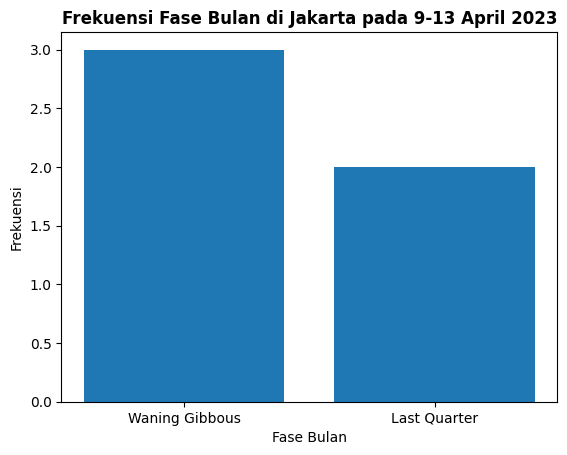

In [ ]:
# visualisasi frekuensi fase bulan pada 'df_hist'

import matplotlib.pyplot as plt
plt.bar(df_fasebulan['Nama Fase'], df_fasebulan['Jumlah'])

# Menambahkan judul dan label sumbu
plt.title('Frekuensi Fase Bulan di Jakarta pada 9-13 April 2023', fontweight='bold')
plt.xlabel('Fase Bulan')
plt.ylabel('Frekuensi')

# Menampilkan plot
plt.show()

Pada bar plot diatas, terlihat perubahan frekuensi fase bulan yang terjadi di Jakarta pada tanggal 9-13 April 2023. Fase bulan terbanyak adalah Waning Gibbous dengan jumlah 3 sedangkan fase bulan Last Quarter berjumlah 2.

Wanning Gibbous : fase bulan yang terjadi ketika cahaya yang terlihat pada permukaan Bulan mulai berkurang setelah mencapai titik puncak atau Full Moon. Fase ini terjadi ketika Bulan telah melewati posisi Full Moon dan kini mengalami sedikit penurunan cahaya atau fase.

Last Quarter : fase bulan yang terjadi ketika Bulan berada pada posisi yang berlawanan dengan posisi Full Moon dalam orbitnya. Fase ini terjadi ketika Bulan berada tepat di antara Bumi dan Matahari, sehingga hanya setengah bagian dari permukaan Bulan yang terlihat dari Bumi.

# Export Dataframe

In [ ]:
df_pred.to_csv('Tabel Data Prediksi.csv')
df_hist.to_csv('Tabel Data Aktual.csv')

#Kesimpulan



*   Berdasarkan data yang diperoleh, diketahui bahwa sebagian besar hasil prediksi dengan data aktual yang diperoleh memiliki keakuratan yang cukup tinggi.
*   Diketahui berdasarkan hasil yang diperoleh, pada rentang tanggal 9 April 2023-13 April 2023, suhu tertinggi di Jakarta mencapai 35 derajat celcius dengan UV Index di angka 8.
*    Hal ini memberikan informasi bahwa keadaan yang dirasakan cukup panas disertai dengan paparan radiasi matahari yang cukup tinggi. Rata-rata temperatur di jakarta selama 5 hari berkisar antara 29-30 derajat celcius.





# Saran


*   Menggunakan pakaian tertutup seperti celana panjang, topi, dan baju lengan panjang bisa menjadi alternatif berpakaian di masa seperti ini
*   Menggunakan tabir surya untuk pencegahan efek berlebih yang ditimbulkan dari radiasi sinar matahari secara langsung
*   Minum air putih yang cukup untuk menjaga hidrasi dari tubuh agar terhindar dari dehidrasi akibat panas cuaca yang terjadi.